In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
low_flows = pd.read_csv('low_flow_analysis.csv')
peak_flows = pd.read_csv('peak_flow_analysis.csv')

basins = low_flows.columns[1:]
peak_years = peak_flows["water_year"].astype(int)
low_years = low_flows["climatic_year"].astype(int)

In [41]:
calpella_all_data = pd.read_csv('russian_river_data/Calpella_daily.csv')
guerneville_all_data = pd.read_csv('russian_river_data/Guerneville_daily.csv')
hopland_all_data = pd.read_csv('russian_river_data/Hopland_daily.csv')
warmsprings_all_data = pd.read_csv('russian_river_data/WarmSprings_Inflow_daily.csv')

all_data = {'Calpella': calpella_all_data,
            'Guerneville': guerneville_all_data,
            'Hopland': hopland_all_data,
            'Warm Springs': warmsprings_all_data}

Text(0.02, 0.5, 'Low Flows Extremeness')

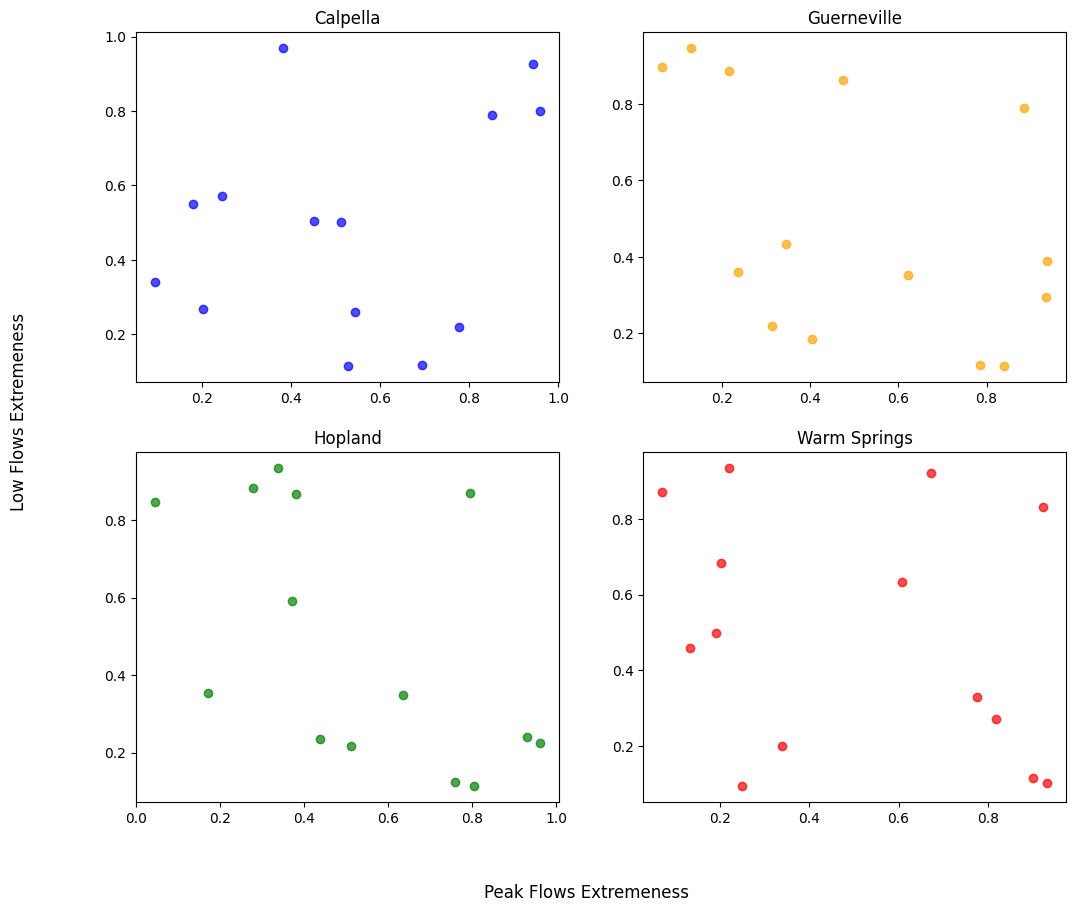

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].scatter(peak_flows['Calpella'][:-1], low_flows['Calpella'], label='Calpella', alpha=0.7, color='blue')
ax[0, 0].set_title('Calpella')
ax[0, 1].scatter(peak_flows['Guerneville'][:-1], low_flows['Guerneville'], label='Guerneville', alpha=0.7, color='orange')
ax[0, 1].set_title('Guerneville')
ax[1, 0].scatter(peak_flows['Hopland'][:-1], low_flows['Hopland'], label='Hopland', alpha=0.7, color='green')
ax[1, 0].set_title('Hopland')
ax[1, 1].scatter(peak_flows['Warm Springs'][:-1], low_flows['Warm Springs'], label='Warm Springs', alpha=0.7, color='red')
ax[1, 1].set_title('Warm Springs')
fig.supxlabel('Peak Flows Extremeness')
fig.supylabel('Low Flows Extremeness')

Peak flow extremeness and low flow extremeness are have basically zero correlation. For extreme years, we're interested in years in top right and bottom left as these represent years with both unusually high peak and unusually low low flows or unusually low peak and unusually high low flows respectively.

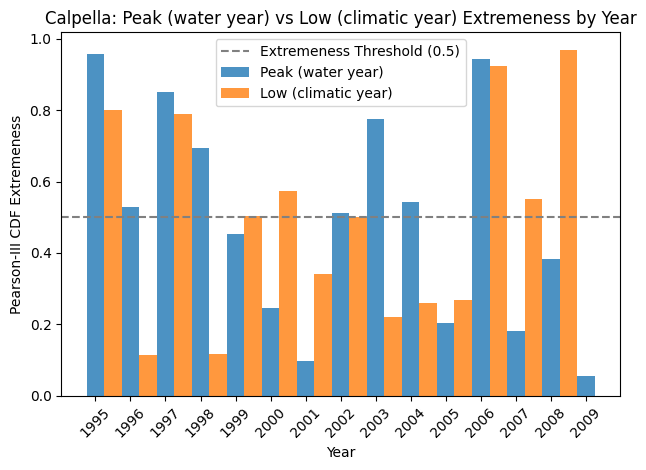

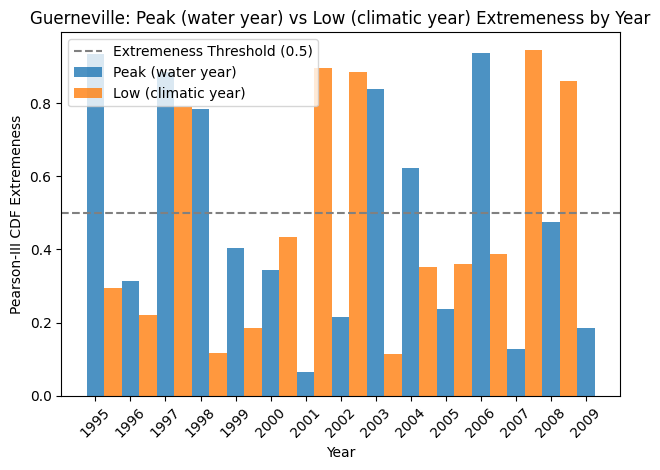

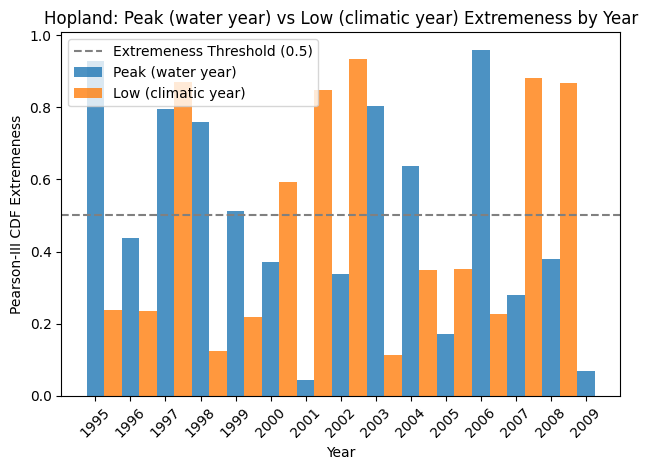

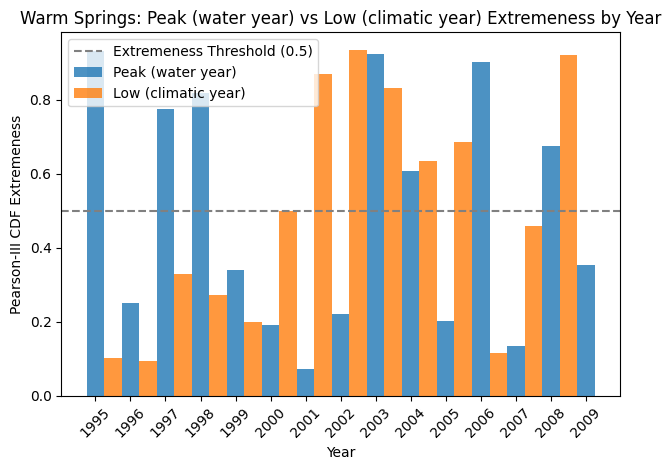

In [43]:
basin_stats = {"calpella": None, "guerneville": None, "hopland": None, "warm_springs": None}

for basin in basins:
    pos = peak_flows[basin]
    low = low_flows[basin]

    basin_stats_df = pd.DataFrame({
        "Year": peak_years[:-1],
        "Peak Extremeness": pos[:-1],
        "Low Extremeness": low
    })
    basin_stats[basin.lower().replace(" ", "_")] = basin_stats_df

    plt.figure()

    plt.bar(peak_years, pos, label="Peak (water year)", alpha=0.8, width=0.5)

    plt.bar(low_years - 0.5, low, label="Low (climatic year)", alpha=0.8, width=0.5)

    plt.axhline(0.5, color='gray', linestyle='--', label='Extremeness Threshold (0.5)')
    plt.xlabel("Year")
    plt.ylabel("Pearson-III CDF Extremeness")
    plt.title(f"{basin}: Peak (water year) vs Low (climatic year) Extremeness by Year")
    plt.legend()

    # Keep ticks aligned to actual water years
    plt.xticks(peak_years, rotation=45)

    plt.tight_layout()
    plt.savefig(f"{basin}_wet_dry_extremeness.png", dpi=300, bbox_inches="tight")
    plt.show()

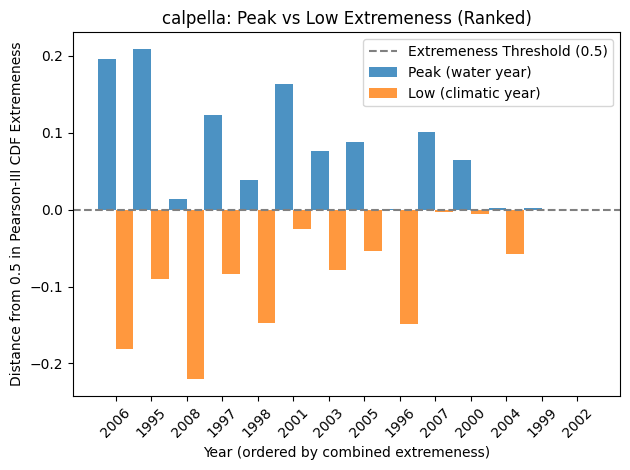

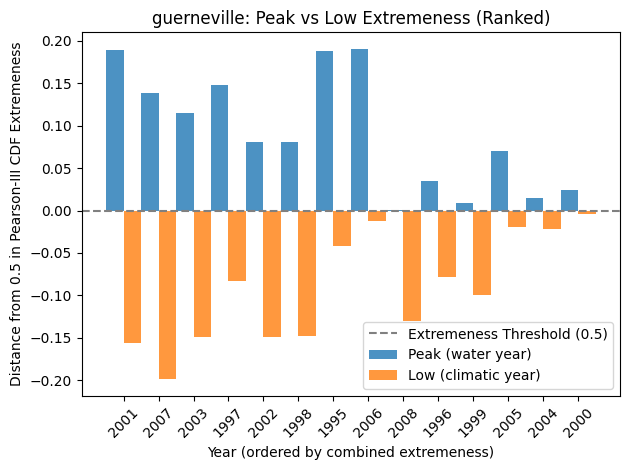

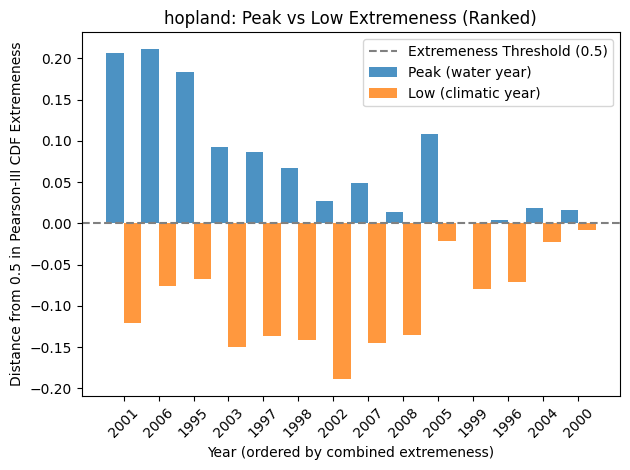

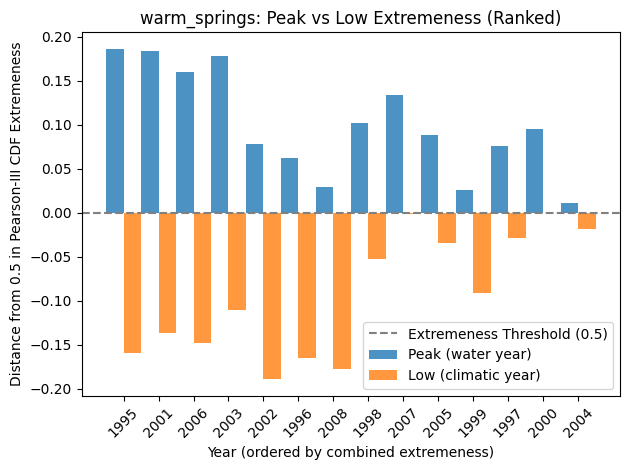

In [ ]:
def year_extremeness(low_cdf, peak_cdf):
    return (low_cdf - 0.5)**2 + (peak_cdf - 0.5) ** 2

for basin in basin_stats:
    basin_data = basin_stats[basin]
    df = basin_data.copy()
    df['Low Extremeness'] = df['Low Extremeness'].apply(lambda x: (x - 0.5) ** 2)
    df['Peak Extremeness'] = df['Peak Extremeness'].apply(lambda x: (x - 0.5)**2)
    df['year_extremeness'] = year_extremeness(df['Low Extremeness'], df['Peak Extremeness'])
    df.sort_values('year_extremeness', inplace=True)

    df['Low Extremeness'] = -df['Low Extremeness']

    
    x = np.arange(len(df))

    plt.figure()

    plt.bar(x, df['Peak Extremeness'], label="Peak (water year)", alpha=0.8, width=0.5)
    plt.bar(x + 0.5, df['Low Extremeness'], label="Low (climatic year)", alpha=0.8, width=0.5)

    plt.axhline(0, color='gray', linestyle='--', label='Extremeness Threshold (0.5)')
    plt.xlabel("Year (ordered by combined extremeness)")
    plt.ylabel("Distance from 0.5 in Pearson-III CDF Extremeness")
    plt.title(f"{basin}: Peak vs Low Extremeness (Ranked)")
    plt.legend()

    plt.xticks(x + 0.25, df['Year'], rotation=45)

    plt.tight_layout()
    plt.savefig(f"{basin}_extremeness_sorted.png", dpi=300, bbox_inches="tight")
    plt.show()